In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(480, 852, 3) (480, 852, 3)


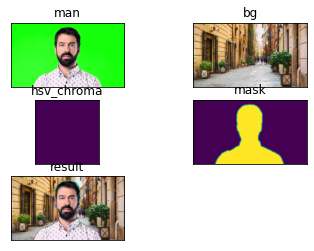

In [3]:
path = './img/man_01.jpg'
path2 = './img/chroma_bg.jpeg'

man = cv2.imread(path)
chro_bg = cv2.imread(path2)
chro_bg = cv2.resize(chro_bg,(852,480))
print(man.shape,chro_bg.shape)

man = cv2.cvtColor(man,cv2.COLOR_BGR2RGB)
chro_bg = cv2.cvtColor(chro_bg,cv2.COLOR_BGR2RGB)

# roi선택을 위한 좌표계산
h1, w1 = man.shape[:2]
h2, w2 = chro_bg.shape[:2]
x = (w2 - w1)//2
y = (h2 - h1)
w = x + w1
h = y + h1

# 크로마키 영역을 10픽셀 지정
chromakey = man[:10,:10,:]
offset = 50

# 크로마키 영역, 영상을 hsv로 변경
hsv_chroma = cv2.cvtColor(chromakey,cv2.COLOR_RGB2HSV)
hsv_img = cv2.cvtColor(man,cv2.COLOR_RGB2HSV)

# 크로마 키 영역의 h값에서 offset만큼 여유를 두어서 범위 지정
# offset값은 여러 차례 시도 후 결정
chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100,100])
upper = np.array([chroma_h.max()+offset, 255,255])

mask = cv2.inRange(hsv_img,lower,upper)
mask_inv = cv2.bitwise_not(mask)
mask = cv2.blur(mask,(10,10))
mask_inv = cv2.blur(mask_inv,(10,10))
roi = chro_bg[y:h,x:w]
fg = cv2.bitwise_and(man,man,mask=mask_inv)
bg = cv2.bitwise_and(chro_bg,chro_bg,mask=mask)

result = bg+fg

imgs = {'man':man, 'bg':chro_bg, 'hsv_chroma':chroma_h, 'mask':mask_inv,\
       'result':result}


for i, (key,value) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(key)
    plt.imshow(value)
    plt.xticks([]); plt.yticks([])
plt.show()